# IMDB project: predicting movies scores
### by Javier Alonso

This Jupyter Notebook is part of ["My IMDB project"](https://javieralonsoalonso.com/category/my-imdb-project/) and tries to classify movies correctly in different labels depending on the average score. We saw in prior parts of the project that predicting the rate of movies is really difficult, let´s see if with labels the results are better.

The database was downloaded from IMDB on 2020/05/25 but some days after, they changed all the system for retrieving the data, so we won´t be able to upgrade easily the project with new data.

The results have been posted in my ["My blog"](https://javieralonsoalonso.com/category/my-imdb-project/)

## Table of Contents

1. [Preliminary Wrangling](#Preliminary_Wrangling)<br>
1.a.-[Gathering Data](#Gathering_Data)<br>
1.b.-[Assesing and Cleaning Data](#Assesing_cleaning_data)<br>
1.c.-[Consolidation of Dataframes](#Consolidaion_dataframes)<br>
2. [Machine Learning Algorithm](#MLA)<br>
3.a.-[Data preparation](#Data_preparation)<br>
3.b.-[Algorithm Selection](#Alg_Selection)<br>

## <a class="anchor" id="Preliminary_Wrangling">Part 1: Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform as sp_rand
from scipy.stats import uniform as sp_randFloat
from scipy.stats import uniform as sp_randInt
from scipy.stats import uniform as sp_random

### <a class="anchor" id="Gathering_Data"> 1.a.- Gathering Data

In this section we´ll gather data from the precleaned dataset for the EDA

In [2]:
df_movies = pd.read_csv('IMDB_clean_movies.csv')
df_movies.shape

(221748, 12)

A view of the dataframe

In [3]:
df_movies.head(5)

,idMovie,originalTitle,Year,Minutes,Genres,averageRating,numVotes,decade,director,actors,actress,writers
0,tt0000009,Miss Jerry,1894,45,Romance,5.9,153,1890,Alexander Black,"William Courtenay,Chauncey Depew",Blanche Bayliss,Not available
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",5.2,346,1890,Enoch J. Rector,Not available,Not available,Not available
2,tt0000335,Soldiers of the Cross,1900,91,"Biography,Drama",6.1,40,1900,"Herbert Booth,Joseph Perry","Harold Graham,Mr. Graham,John Jones,Orrie Perr...",Beatrice Day,Not available
3,tt0000502,Bohemios,1905,100,No available,3.8,6,1900,Ricardo de Baños,"Antonio del Pozo,El Mochuelo",Not available,"Marguerite Thévenard,Bleuette Bernon"
4,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,574,1900,Charles Tait,"John Tait,Norman Campbell","Elizabeth Tait,Bella Cola",Not available


### <a class="anchor" id="Assesing_cleaning_data"> 1.b.- Asessing and cleaning data

Now, we´re going to assess the dataframe visually and programmatically for quality and tidiness issues, and do the cleaning of these issues

First thing we do a copy of my dataframe


In [4]:
movies = df_movies.copy()

In [5]:
movies.head()

,idMovie,originalTitle,Year,Minutes,Genres,averageRating,numVotes,decade,director,actors,actress,writers
0,tt0000009,Miss Jerry,1894,45,Romance,5.9,153,1890,Alexander Black,"William Courtenay,Chauncey Depew",Blanche Bayliss,Not available
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",5.2,346,1890,Enoch J. Rector,Not available,Not available,Not available
2,tt0000335,Soldiers of the Cross,1900,91,"Biography,Drama",6.1,40,1900,"Herbert Booth,Joseph Perry","Harold Graham,Mr. Graham,John Jones,Orrie Perr...",Beatrice Day,Not available
3,tt0000502,Bohemios,1905,100,No available,3.8,6,1900,Ricardo de Baños,"Antonio del Pozo,El Mochuelo",Not available,"Marguerite Thévenard,Bleuette Bernon"
4,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,574,1900,Charles Tait,"John Tait,Norman Campbell","Elizabeth Tait,Bella Cola",Not available


#### Keeping movies with more than 100 votes

For the prediction we will keep only the movies with more than 100 votes. The rest are very unpredictable. Let´s see if these can be predicted

In [6]:
movies.describe()

,Year,Minutes,averageRating,numVotes,decade
count,221748.000000,221748.000000,221748.000000,2.217480e+05,221748.000000
mean,1990.273035,94.930047,6.048698,3.667128e+03,1985.555541
std,26.151198,34.030400,1.305295,3.315393e+04,26.066786
min,1894.000000,1.000000,1.000000,5.000000e+00,1890.000000
25%,1973.000000,85.000000,5.300000,1.500000e+01,1970.000000
50%,1999.000000,91.000000,6.200000,5.600000e+01,1990.000000
75%,2012.000000,102.000000,6.900000,3.080000e+02,2010.000000
max,2020.000000,10062.000000,10.000000,2.242140e+06,2020.000000


In [54]:
len(movies)

221748

In [7]:
movies = movies[movies.numVotes>100]

In [56]:
len(movies)

89464

So we will try to predict the rates over almost 90.000 movies that have more than 100 votes.

#### Incorrect datatypes

Decade should be string. We change the datatype

In [8]:
movies.decade = movies.decade.astype(str)

In [58]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89464 entries, 0 to 221742
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idMovie        89464 non-null  object 
 1   originalTitle  89464 non-null  object 
 2   Year           89464 non-null  int64  
 3   Minutes        89464 non-null  int64  
 4   Genres         89464 non-null  object 
 5   averageRating  89464 non-null  float64
 6   numVotes       89464 non-null  int64  
 7   decade         89464 non-null  object 
 8   director       89464 non-null  object 
 9   actors         89464 non-null  object 
 10  actress        89461 non-null  object 
 11  writers        89463 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 8.9+ MB


#### Deleting columns

**Director, actors, actress and writers column** as we will get them from other dataframe

In [9]:
movies = movies.drop(['director'], axis=1)
movies = movies.drop(['actors'], axis=1)
movies = movies.drop(['actress'], axis=1)
movies = movies.drop(['writers'], axis=1)

In [60]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89464 entries, 0 to 221742
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idMovie        89464 non-null  object 
 1   originalTitle  89464 non-null  object 
 2   Year           89464 non-null  int64  
 3   Minutes        89464 non-null  int64  
 4   Genres         89464 non-null  object 
 5   averageRating  89464 non-null  float64
 6   numVotes       89464 non-null  int64  
 7   decade         89464 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ MB


#### Getting the crews info

In [10]:
#We read data of the crew
df_principals = pd.read_csv("title.principals.tsv",  sep="\t", na_values=["\\N","nan"])
df_names = pd.read_csv("name.basics.tsv", sep="\t", na_values=["\\N","nan"])

In [11]:
df_names.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0043044"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0071877,tt0037382,tt0038355,tt0117057"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0054452,tt0059956,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,soundtrack,writer","tt0080455,tt0078723,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0083922,tt0060827,tt0050986,tt0050976"


In [12]:
#in principals we just keep some columns and only the actor, actress, director and writer
principals = df_principals[['tconst','ordering','nconst','category']]
principals = principals[principals.category.isin(['actor','actress', 'director','writer'])]

In [13]:
#We keep the principal of each category, by the ordering field
principals2 = principals.groupby(["tconst", "category"])['ordering'].min().reset_index()
crew = pd.merge(principals2, principals, left_on = ['tconst','category','ordering'], right_on = ['tconst','category','ordering'], how = 'left')

In [14]:
#We get the name of the person
crew = pd.merge(crew, df_names[['nconst','primaryName']], left_on = 'nconst', right_on = 'nconst', how = 'left')
#I just keep the fields I need
crew = crew[['tconst','category', 'primaryName']]

In [15]:
crew.head()

,tconst,category,primaryName
0,tt0000001,director,William K.L. Dickson
1,tt0000002,director,Émile Reynaud
2,tt0000003,director,Émile Reynaud
3,tt0000004,director,Émile Reynaud
4,tt0000005,actor,Charles Kayser


In [16]:
#We pivot the table
crew = crew.pivot_table(values='primaryName', index=['tconst'],
                    columns=['category'], aggfunc='first').reset_index()

In [17]:
crew.head()

category,tconst,actor,actress,director,writer
0,tt0000001,NaN,NaN,William K.L. Dickson,NaN
1,tt0000002,NaN,NaN,Émile Reynaud,NaN
2,tt0000003,NaN,NaN,Émile Reynaud,NaN
3,tt0000004,NaN,NaN,Émile Reynaud,NaN
4,tt0000005,Charles Kayser,NaN,William K.L. Dickson,NaN


In [18]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937749 entries, 0 to 4937748
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   tconst    object
 1   actor     object
 2   actress   object
 3   director  object
 4   writer    object
dtypes: object(5)
memory usage: 188.4+ MB


In [19]:
#I replace NaNs
crew['actor'].fillna('Not available', inplace=True)
crew['actress'].fillna('Not available', inplace=True)
crew['director'].fillna('Not available', inplace=True)
crew['writer'].fillna('Not available', inplace=True)

In [20]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937749 entries, 0 to 4937748
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   tconst    object
 1   actor     object
 2   actress   object
 3   director  object
 4   writer    object
dtypes: object(5)
memory usage: 188.4+ MB


In [21]:
crew.head()

category,tconst,actor,actress,director,writer
0,tt0000001,Not available,Not available,William K.L. Dickson,Not available
1,tt0000002,Not available,Not available,Émile Reynaud,Not available
2,tt0000003,Not available,Not available,Émile Reynaud,Not available
3,tt0000004,Not available,Not available,Émile Reynaud,Not available
4,tt0000005,Charles Kayser,Not available,William K.L. Dickson,Not available


**Consolidation of crew dataframe**

In [22]:
crew.to_csv('IMDB_clean_crew.csv', index = False)

In [ ]:
crew = pd.read_csv('IMDB_clean_crew.csv')

**Merging the information**

In [23]:
movies = pd.merge(movies, crew, left_on = 'idMovie', right_on = 'tconst', how = 'left')

In [24]:
movies.columns

Index(['idMovie', 'originalTitle', 'Year', 'Minutes', 'Genres',
       'averageRating', 'numVotes', 'decade', 'tconst', 'actor', 'actress',
       'director', 'writer'],
      dtype='object')

In [25]:
len(movies)

89464

In [26]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89464 entries, 0 to 89463
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idMovie        89464 non-null  object 
 1   originalTitle  89464 non-null  object 
 2   Year           89464 non-null  int64  
 3   Minutes        89464 non-null  int64  
 4   Genres         89464 non-null  object 
 5   averageRating  89464 non-null  float64
 6   numVotes       89464 non-null  int64  
 7   decade         89464 non-null  object 
 8   tconst         89261 non-null  object 
 9   actor          89261 non-null  object 
 10  actress        89261 non-null  object 
 11  director       89261 non-null  object 
 12  writer         89261 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 9.6+ MB


In [27]:
#We delete the nans
movies = movies.dropna()

**Keeping only the important crew**

In [28]:
movies.head()

,idMovie,originalTitle,Year,Minutes,Genres,averageRating,numVotes,decade,tconst,actor,actress,director,writer
0,tt0000009,Miss Jerry,1894,45,Romance,5.9,153,1890,tt0000009,William Courtenay,Blanche Bayliss,Alexander Black,Not available
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",5.2,346,1890,tt0000147,Not available,Not available,Enoch J. Rector,Not available
2,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,574,1900,tt0000574,John Tait,Elizabeth Tait,Charles Tait,Not available
3,tt0001892,Den sorte drøm,1911,53,Drama,5.9,182,1910,tt0001892,Valdemar Psilander,Asta Nielsen,Urban Gad,Gebhard Schätzler-Perasini
4,tt0002101,Cleopatra,1912,100,"Drama,History",5.2,440,1910,tt0002101,Charles Sindelar,Helen Gardner,Charles L. Gaskill,Victorien Sardou


In [29]:
n_actors = len(movies.actor.unique())
n_actress = len(movies.actress.unique())
n_director = len(movies.director.unique())
n_writer = len(movies.writer.unique())

In [30]:
print("There are", n_actors, "different actors,", n_actress,"different actresses,", n_director," different directors and", n_writer,"different writers")

There are 32821 different actors, 31924 different actresses, 32755  different directors and 34652 different writers


With these numbers is impossible to create different dummies for each of them so we are going to delimit them to 500 for each category, that will be the ones that are present in more movies

In [31]:
n = 500
top_actors = movies[movies.actor != 'Not available'].groupby("actor")['idMovie'].count()
top_actors = top_actors.to_frame().reset_index().sort_values(by = 'idMovie', ascending = False)['actor'].head(n).to_list()
top_actress = movies[movies.actress != 'Not available'].groupby("actress")['idMovie'].count()
top_actress = top_actress.to_frame().reset_index().sort_values(by = 'idMovie', ascending = False)['actress'].head(n).to_list()
top_director = movies[movies.director != 'Not available'].groupby("director")['idMovie'].count()
top_director = top_director.to_frame().reset_index().sort_values(by = 'idMovie', ascending = False)['director'].head(n).to_list()
top_writer = movies[movies.writer != 'Not available'].groupby("writer")['idMovie'].count()
top_writer = top_writer.to_frame().reset_index().sort_values(by = 'idMovie', ascending = False)['writer'].head(n).to_list()

In [32]:
movies.actor.value_counts()

Not available       3970
Mohanlal             194
Mammootty            134
John Wayne           123
Amitabh Bachchan     115
                    ... 
Jun'ichi Inoue         1
Bob Arbogast           1
Phil Askham            1
Ricardo Abarca         1
Vincent Valladon       1
Name: actor, Length: 32821, dtype: int64

In [33]:
movies.actor = movies.actor.apply(lambda x: x if x in top_actors else "Not available")
movies.actress = movies.actress.apply(lambda x: x if x in top_actress else "Not available")
movies.director = movies.director.apply(lambda x: x if x in top_director else "Not available")
movies.writer = movies.writer.apply(lambda x: x if x in top_writer else "Not available")

In [34]:
movies.actor.value_counts()

Not available       71907
Mohanlal              194
Mammootty             134
John Wayne            123
Amitabh Bachchan      115
                    ...  
Tôru Furuya            21
Frank Morgan           21
Stephen Rea            21
Daniel Brühl           21
David Chiang           21
Name: actor, Length: 501, dtype: int64

In [35]:
movies.head()

,idMovie,originalTitle,Year,Minutes,Genres,averageRating,numVotes,decade,tconst,actor,actress,director,writer
0,tt0000009,Miss Jerry,1894,45,Romance,5.9,153,1890,tt0000009,Not available,Not available,Not available,Not available
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",5.2,346,1890,tt0000147,Not available,Not available,Not available,Not available
2,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,574,1900,tt0000574,Not available,Not available,Not available,Not available
3,tt0001892,Den sorte drøm,1911,53,Drama,5.9,182,1910,tt0001892,Not available,Not available,Not available,Not available
4,tt0002101,Cleopatra,1912,100,"Drama,History",5.2,440,1910,tt0002101,Not available,Not available,Not available,Not available


**Creating rating labels**
We create labels for movies with higher rating of 8 (quality = 10), between 6 and 8 (quality = 5) and the rest (quality = 0)

In [36]:
movies['quality'] = movies.averageRating.apply(lambda x: 10 if x >= 8 else (5 if x >= 6 else 0))

In [37]:
movies.quality.value_counts()

5     48651
0     38393
10     2217
Name: quality, dtype: int64

In [38]:
movies.quality.value_counts()/len(movies)

5     0.545042
0     0.430121
10    0.024837
Name: quality, dtype: float64

In [81]:
movies = movies.drop(['averageRating'], axis=1)

In [82]:
movies.head()

,idMovie,originalTitle,Year,Minutes,Genres,numVotes,decade,tconst,actor,actress,director,writer,quality
0,tt0000009,Miss Jerry,1894,45,Romance,153,1890,tt0000009,Not available,Not available,Not available,Not available,0
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",346,1890,tt0000147,Not available,Not available,Not available,Not available,0
2,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",574,1900,tt0000574,Not available,Not available,Not available,Not available,5
3,tt0001892,Den sorte drøm,1911,53,Drama,182,1910,tt0001892,Not available,Not available,Not available,Not available,0
4,tt0002101,Cleopatra,1912,100,"Drama,History",440,1910,tt0002101,Not available,Not available,Not available,Not available,0


In [83]:
movies[['originalTitle','Year','Minutes','Genres','director','actor','actress','writer','numVotes','quality']].sort_values(by ='numVotes', ascending = False).head()

,originalTitle,Year,Minutes,Genres,director,actor,actress,writer,numVotes,quality
28523,The Shawshank Redemption,1994,142,Drama,Not available,Not available,Not available,Stephen King,2242140,10
49030,The Dark Knight,2008,152,"Action,Crime,Drama",Not available,Christian Bale,Not available,Not available,2211374,10
58851,Inception,2010,148,"Action,Adventure,Sci-Fi",Not available,Not available,Not available,Not available,1965288,10
32649,Fight Club,1999,139,Drama,Not available,Brad Pitt,Not available,Not available,1783906,10
28451,Pulp Fiction,1994,154,"Crime,Drama",Not available,John Travolta,Uma Thurman,Not available,1756398,10


#### Transforming Skewed Continuous Features

In [84]:
movies.skew(axis = 0) 

Year        -1.111340
Minutes     65.689530
numVotes    14.915560
decade      -1.128467
quality      0.094031
dtype: float64

The rating is aprox Symetric and decade is in reality a cathegory, so we don´t mind Skew of both of them.

We are going to transform Minutes and numVotes for reducing Skewness, due to their high level

In [85]:
movies.Minutes = movies.Minutes.apply(lambda x: np.log(x + 1))
movies.numVotes = movies.numVotes.apply(lambda x: np.log(x + 1))

The results are really good

In [86]:
movies.skew(axis = 0) 

Year       -1.111340
Minutes     0.727177
numVotes    1.289244
decade     -1.128467
quality     0.094031
dtype: float64

#### Normalizing Numerical Features

In [87]:
movies.describe()

,Year,Minutes,numVotes,quality
count,89261.000000,89261.000000,89261.000000,89261.000000
mean,1994.100055,4.594492,6.643522,2.973583
std,23.842121,0.200646,1.741368,2.695861
min,1894.000000,2.708050,4.624973,0.000000
25%,1980.000000,4.488636,5.313206,0.000000
50%,2003.000000,4.564348,6.171701,5.000000
75%,2013.000000,4.691348,7.475906,5.000000
max,2020.000000,8.560444,14.622942,10.000000


In [88]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Minutes', 'numVotes','Year']

movies[numerical] = scaler.fit_transform(movies[numerical])

In [89]:
movies.describe()

,Year,Minutes,numVotes,quality
count,89261.000000,89261.000000,89261.000000,89261.000000
mean,0.794445,0.322337,0.201896,2.973583
std,0.189223,0.034284,0.174172,2.695861
min,0.000000,0.000000,0.000000,0.000000
25%,0.682540,0.304249,0.068837,0.000000
50%,0.865079,0.317186,0.154704,5.000000
75%,0.944444,0.338887,0.285151,5.000000
max,1.000000,1.000000,1.000000,10.000000


In [91]:
movies.head()

,idMovie,originalTitle,Year,Minutes,Genres,numVotes,decade,tconst,actor,actress,director,writer,quality
0,tt0000009,Miss Jerry,0.000000,0.191476,Romance,0.041206,1890,tt0000009,Not available,Not available,Not available,Not available,0
1,tt0000147,The Corbett-Fitzsimmons Fight,0.023810,0.057493,"Documentary,News,Sport",0.122460,1890,tt0000147,Not available,Not available,Not available,Not available,0
2,tt0000574,The Story of the Kelly Gang,0.095238,0.265640,"Biography,Crime,Drama",0.172975,1900,tt0000574,Not available,Not available,Not available,Not available,5
3,tt0001892,Den sorte drøm,0.134921,0.218873,Drama,0.058463,1910,tt0001892,Not available,Not available,Not available,Not available,0
4,tt0002101,Cleopatra,0.142857,0.325862,"Drama,History",0.146437,1910,tt0002101,Not available,Not available,Not available,Not available,0


### Creating Dummy columns

**Genres**

In [92]:
movies = movies.join(movies.Genres.str.get_dummies(sep=',').add_prefix('genre_'))
movies = movies.drop(['Genres'], axis=1)

In [93]:
movies = movies.drop(['genre_No available'], axis=1)
movies = movies.drop(['tconst'], axis=1)

**Rest of dummies**

In [94]:
movies_final = pd.get_dummies(movies, prefix=['dec_','actor_','actress_','dir_','writ_'], columns=['decade','actor','actress','director','writer'])

In [95]:
movies_final.head()

,idMovie,originalTitle,Year,Minutes,numVotes,quality,genre_Action,genre_Adult,genre_Adventure,genre_Animation,...,writ__Yasunari Kawabata,writ__Yevgeny Gabrilovich,writ__Yin Nam,writ__Yolanda García Serrano,writ__Yoshito Usui,writ__Youssef Maaty,writ__Yuriy Arabov,writ__Yuriy Korotkov,writ__Ángeles González Sinde,writ__Émile Zola
0,tt0000009,Miss Jerry,0.000000,0.191476,0.041206,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0000147,The Corbett-Fitzsimmons Fight,0.023810,0.057493,0.122460,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0000574,The Story of the Kelly Gang,0.095238,0.265640,0.172975,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0001892,Den sorte drøm,0.134921,0.218873,0.058463,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0002101,Cleopatra,0.142857,0.325862,0.146437,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
movies_final.shape

(89261, 2050)

### <a class="anchor" id="Consolidaion_dataframes"> 1.c.- Consolidation of dataframes

In this section we´re going to consolidate both dataframes into files, that we´ll read for the next sections

In [97]:
movies_final.to_csv('IMDB_clean_movies_clasif_0.csv', index = False)

## <a class="anchor" id="MLA">Part 2: Machine learning algorithm

### <a class="anchor" id="Data_preparation"> 3.a.- Data preparation
We import the data and fix importation issues

In [2]:
movies = pd.read_csv('IMDB_clean_movies_clasif_0.csv')

In [3]:
movies = movies.drop(['actor__Not available','dir__Not available','actress__Not available','writ__Not available'], axis=1)

In [4]:
movies.shape

(89261, 2046)

In [5]:
movies.head()

,idMovie,originalTitle,Year,Minutes,numVotes,quality,genre_Action,genre_Adult,genre_Adventure,genre_Animation,...,writ__Yasunari Kawabata,writ__Yevgeny Gabrilovich,writ__Yin Nam,writ__Yolanda García Serrano,writ__Yoshito Usui,writ__Youssef Maaty,writ__Yuriy Arabov,writ__Yuriy Korotkov,writ__Ángeles González Sinde,writ__Émile Zola
0,tt0000009,Miss Jerry,0.000000,0.191476,0.041206,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0000147,The Corbett-Fitzsimmons Fight,0.023810,0.057493,0.122460,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0000574,The Story of the Kelly Gang,0.095238,0.265640,0.172975,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0001892,Den sorte drøm,0.134921,0.218873,0.058463,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0002101,Cleopatra,0.142857,0.325862,0.146437,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
movies1 = movies.copy()
movies1 = movies1[['quality']]

In [7]:
movies1.shape

(89261, 1)

In [8]:
movies2 = movies.copy()
movies2 = movies2.drop(['idMovie','originalTitle','quality'], axis=1)

In [9]:
movies2.shape

(89261, 2043)

#### Applying PCA

In this section we will apply feature reduction with PCA to the dataset with default values, without fixing the number of components. We will do it over movies2, that hasn´t categorical variables

In [107]:
# Apply PCA to the data.
pca = PCA()
movies_pca = pca.fit_transform(movies2)

In [108]:
column_names = ["Component", "variance", "acumulative_variance"]
variances = pd.DataFrame(columns = column_names)
var_acu = 0
for i in range(len(pca.explained_variance_ratio_)):
    comp = i +1 
    var = pca.explained_variance_ratio_[i]
    var_acu = var_acu +  var
    variances.loc[i] = [comp, var, var_acu]

Now we plot the acumulative and individual variance ratio versus the number oc principal components used

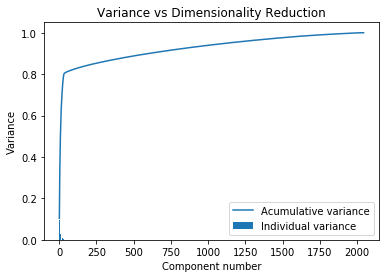

In [109]:
plt.plot(variances.Component, variances.acumulative_variance);
plt.bar(variances.Component, variances.variance);
plt.xlabel('Component number') 
plt.ylabel('Variance');
plt.legend(['Acumulative variance','Individual variance']);
plt.title('Variance vs Dimensionality Reduction');

In [110]:
variances.head()

,Component,variance,acumulative_variance
0,1.0,0.103686,0.103686
1,2.0,0.097857,0.201543
2,3.0,0.075075,0.276618
3,4.0,0.057861,0.334479
4,5.0,0.046976,0.381455


We´ve decided to keep the 95% of the variability in the original data, so we are going to reduce the dataframe to 2268 dimensions (the initial variables where 4047)

In [118]:
for i in range(len(variances)):
    if variances.acumulative_variance[i] > 0.80:
        num = i
        var = variances.acumulative_variance[i]
        break
        
print("Amazing!!! using", i, "variables, we can explain", round(var,2), "of the variability in the original data.")

Amazing!!! using 31 variables, we can explain 0.8 of the variability in the original data.


In [120]:
for i in range(len(variances)):
    if variances.acumulative_variance[i] > 0.95:
        num = i
        var = variances.acumulative_variance[i]
        break
        
print("Using", i, "variables, we can explain", round(var,2), "of the variability in the original data.")

Using 1129 variables, we can explain 0.95 of the variability in the original data.


In [10]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components = 1129)
movies_pca = pca.fit_transform(movies2)

In [11]:
movies_pca_end = pd.DataFrame(movies_pca)
movies_pca_end.head()

,0,1,2,3,4,5,6,7,8,9,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
0,0.168132,-0.345321,0.062495,-0.371486,0.645767,0.762274,0.221045,-0.346854,-0.240495,-0.054890,...,0.002216,-0.002479,-0.003532,-0.000976,0.007023,-0.016850,0.009870,0.000036,-0.020869,-0.007543
1,0.207601,-0.163749,0.406540,-0.316045,0.350537,0.127524,-0.397607,-0.176651,-0.520293,-0.089110,...,0.003172,-0.001103,-0.003536,-0.000780,0.008083,-0.015663,0.009319,-0.000671,-0.019250,-0.007108
2,-0.700573,-0.228492,0.117978,-0.454358,-0.176065,-0.393415,0.106178,-0.547501,-0.537877,0.176994,...,0.000878,-0.002528,-0.003502,-0.000553,0.005542,-0.013235,0.008162,0.001296,-0.016869,-0.006893
3,-0.594064,-0.239859,-0.044494,-0.355493,0.157148,-0.090081,-0.313224,-0.105393,-0.019767,-0.120207,...,-0.002910,-0.000293,-0.001225,0.001123,-0.001626,-0.002851,-0.002967,-0.002756,0.000666,-0.000325
4,-0.625762,-0.222829,-0.043266,-0.359001,0.154158,-0.059058,-0.379121,-0.095022,-0.091098,-0.126100,...,-0.002930,-0.000845,-0.001506,0.000535,-0.002322,-0.002597,-0.002417,-0.002260,0.001700,-0.000850


#### Interpreting Principal Components

Now that we have our transformed principal components, we are going to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

In [12]:
def pc_indexes(df, pca, n):
    """
    Gives the 10 most important variables with its weights in the component n after applying pca to de dataframe df
    
    INPUT: df (dataframe), pca (transformation applied), n(principal component to analyze)
    OUTPUT: list of the top 10 variables and their weights
    """

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = df.keys())
    components.index = dimensions
    df_comp = components.iloc[n-1].to_frame()
    df_comp["Abs_value"] = df_comp.abs()
    df_comp = df_comp.sort_values(by='Abs_value', ascending = False)
    df_comp = df_comp[df_comp.columns[0]].head(10)
    return df_comp


In [124]:
# Get weights for the first principal component
pc_indexes(movies2, pca, 1)

genre_Drama       -0.7814
genre_Comedy       0.5923
genre_Horror       0.0830
dec__2010          0.0771
genre_Crime       -0.0767
genre_Adventure    0.0685
dec__2000         -0.0617
genre_Action       0.0342
genre_Family       0.0327
genre_Animation    0.0312
Name: Dimension 1, dtype: float64

In [125]:
pc_indexes(movies2, pca, 2)

dec__2010         0.8190
dec__2000        -0.4133
genre_Comedy     -0.2248
Year              0.1713
genre_Thriller    0.1330
genre_Romance    -0.1264
dec__1990        -0.1070
genre_Horror      0.0985
dec__1980        -0.0694
dec__1970        -0.0572
Name: Dimension 2, dtype: float64

In [126]:
pc_indexes(movies2, pca, 3)

genre_Comedy      -0.5572
genre_Drama       -0.4227
genre_Thriller     0.3293
genre_Romance     -0.3203
genre_Action       0.3012
genre_Horror       0.2568
dec__2010         -0.2475
genre_Crime        0.1630
dec__2000          0.1218
genre_Adventure    0.1193
Name: Dimension 3, dtype: float64

In [127]:
pc_indexes(movies2, pca, 4)

dec__2000       0.7897
dec__1990      -0.3156
Year            0.2690
dec__2010       0.2309
dec__1980      -0.1778
dec__1970      -0.1527
genre_Action   -0.1222
dec__1960      -0.1166
genre_Crime    -0.1067
genre_Horror    0.1037
Name: Dimension 4, dtype: float64

We can see that the first 4 principal components are based on the genre and when it was filmed (different decades or year)

#### Merging dataframes

In [128]:
movies_pca_end

,0,1,2,3,4,5,6,7,8,9,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
0,0.168132,-0.345321,0.062495,-0.371486,0.645767,0.762274,0.221045,-0.346854,-0.240495,-0.054890,...,-0.013363,-0.004269,0.014367,0.004837,-0.010803,0.003903,0.023324,0.010625,-0.003093,-0.007819
1,0.207601,-0.163749,0.406540,-0.316045,0.350537,0.127524,-0.397607,-0.176651,-0.520293,-0.089110,...,-0.011274,-0.002859,0.014565,0.004113,-0.008541,0.003831,0.020911,0.011466,-0.003636,-0.007352
2,-0.700573,-0.228492,0.117978,-0.454358,-0.176065,-0.393415,0.106178,-0.547501,-0.537877,0.176994,...,-0.010994,-0.004015,0.011399,0.004001,-0.009179,0.002948,0.019826,0.008052,-0.002087,-0.006332
3,-0.594064,-0.239859,-0.044494,-0.355493,0.157148,-0.090081,-0.313224,-0.105393,-0.019767,-0.120207,...,-0.000044,0.002789,-0.002466,-0.000614,0.002956,0.000307,-0.003512,0.002025,0.000853,-0.001000
4,-0.625762,-0.222829,-0.043266,-0.359001,0.154158,-0.059058,-0.379121,-0.095022,-0.091098,-0.126100,...,-0.000865,0.001527,-0.003244,-0.000828,0.002646,-0.000104,-0.002546,0.002015,0.001324,-0.000996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89256,0.089895,0.503367,-0.878976,0.128683,-0.256911,-0.363551,-0.089429,0.071282,0.190243,-0.045432,...,0.000929,-0.000108,-0.000795,-0.000100,0.000293,-0.000647,-0.001197,-0.000594,0.000420,0.000758
89257,0.795182,-0.274063,-0.206464,-0.088407,0.018361,-0.236828,-0.113584,0.014410,-0.013650,-0.069571,...,-0.000199,0.000076,0.000625,-0.000780,0.000440,-0.000088,0.000649,0.000964,0.000408,0.000423
89258,0.013719,-0.316096,-0.627990,-0.102430,-0.146735,-0.414720,-0.137791,0.084646,0.237222,-0.073418,...,-0.000432,0.000200,0.000094,-0.000458,0.000595,-0.000054,0.000526,0.000933,0.000539,0.000467
89259,-0.502584,0.728282,-0.322365,0.112482,-0.039322,-0.050208,-0.191863,0.061044,-0.039485,0.016310,...,0.000612,-0.000159,-0.001127,0.000027,0.000212,-0.000609,-0.000904,-0.000718,0.000586,0.000677


In [129]:
movies1

,quality
0,0
1,0
2,5
3,0
4,0
...,...
89256,5
89257,0
89258,5
89259,10


In [13]:
df_movies = pd.merge(movies1, movies_pca_end, left_index=True, right_index=True)

In [14]:
df_movies.head()

,quality,0,1,2,3,4,5,6,7,8,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
0,0,0.168132,-0.345321,0.062495,-0.371486,0.645767,0.762274,0.221045,-0.346854,-0.240495,...,0.002216,-0.002479,-0.003532,-0.000976,0.007023,-0.016850,0.009870,0.000036,-0.020869,-0.007543
1,0,0.207601,-0.163749,0.406540,-0.316045,0.350537,0.127524,-0.397607,-0.176651,-0.520293,...,0.003172,-0.001103,-0.003536,-0.000780,0.008083,-0.015663,0.009319,-0.000671,-0.019250,-0.007108
2,5,-0.700573,-0.228492,0.117978,-0.454358,-0.176065,-0.393415,0.106178,-0.547501,-0.537877,...,0.000878,-0.002528,-0.003502,-0.000553,0.005542,-0.013235,0.008162,0.001296,-0.016869,-0.006893
3,0,-0.594064,-0.239859,-0.044494,-0.355493,0.157148,-0.090081,-0.313224,-0.105393,-0.019767,...,-0.002910,-0.000293,-0.001225,0.001123,-0.001626,-0.002851,-0.002967,-0.002756,0.000666,-0.000325
4,0,-0.625762,-0.222829,-0.043266,-0.359001,0.154158,-0.059058,-0.379121,-0.095022,-0.091098,...,-0.002930,-0.000845,-0.001506,0.000535,-0.002322,-0.002597,-0.002417,-0.002260,0.001700,-0.000850


### <a class="anchor" id="Alg_Selection"> 3.b.- Algorithm Selection
We´re going to test a few regression algorithms with all the features and the default parameters to see which one works better and we will check the naive predictor
    
**Naive Predictor Performace**

43% of movies are of category 0, 54.5% are of category 5 and 2.5% are of category 10. The Naive Predictor would be a silly predictor that predicts all movies belong to category 5 and an accuracy of 0.54. The score would be of a silly predictor with no intelligence. We calculate it as a reference for our scores
    
**Testing algorithms**
    


In [15]:
X = df_movies.drop("quality", axis=1).copy()
y = df_movies["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((71408, 1129), (71408,), (17853, 1129), (17853,))

In [16]:
#function to test the algorithm
def test_model(alg):
    train_score = 0
    test_score = 0
    clf = alg
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True,zero_division= 0  )
    df_rep = pd.DataFrame(report)
    
    
    accuracy = df_rep.iloc[0,3]
    f1_macro = df_rep.iloc[2,4]
    f1_weight = df_rep.iloc[2,5]
    
    return accuracy, f1_macro, f1_weight

In [136]:
model = {'Logistic Regression' : LogisticRegression(),
              'SVC' : SVC(),
              'KNN': KNeighborsClassifier(n_neighbors = 3),
              'GaussianNB': GaussianNB(),
              'Perceptron': Perceptron(),
              'SGP': SGDClassifier(),
              'Random Forest': RandomForestClassifier(n_estimators=100),
              'Adaboost': AdaBoostClassifier(n_estimators=100),
              'linear svc': LinearSVC()}

In [17]:
model_comparison_df = pd.DataFrame(columns=['Algorithm','Accuracy','F1_macro', 'F1_weight'])       

In [18]:
#Test Linear Regression, create df of scores and its score
model = test_model(LogisticRegression())
model_comparison_df = model_comparison_df.append({'Algorithm' : 'LogisticRegression()', 'Accuracy' : model[0], 'F1_macro' : model[1], 'F1_weight' : model[2]} , ignore_index=True)

C:\Users\cance\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
#Test SVC, create add score to df
model = test_model(SVC())
model_comparison_df = model_comparison_df.append({'Algorithm' : 'SVC', 'Accuracy' : model[0], 'F1_macro' : model[1], 'F1_weight' : model[2]} , ignore_index=True)

In [22]:
#Test KNeighborsClassifier, create add score to df
model =test_model(KNeighborsClassifier(n_neighbors = 3))
model_comparison_df = model_comparison_df.append({'Algorithm' : 'KNeighborsClassifier', 'Accuracy' : model[0], 'F1_macro' : model[1], 'F1_weight' : model[2]} , ignore_index=True)

In [24]:
#Test GaussianNB(), create add score to df
model =test_model(GaussianNB())
model_comparison_df = model_comparison_df.append({'Algorithm' : 'GaussianNB', 'Accuracy' : model[0], 'F1_macro' : model[1], 'F1_weight' : model[2]} , ignore_index=True)

In [26]:
#Test Perceptron(), create add score to df
model =test_model(Perceptron())
model_comparison_df = model_comparison_df.append({'Algorithm' : 'Perceptron', 'Accuracy' : model[0], 'F1_macro' : model[1], 'F1_weight' : model[2]} , ignore_index=True)

In [28]:
#Test SGDClassifier(), create add score to df
model =test_model(SGDClassifier())
model_comparison_df = model_comparison_df.append({'Algorithm' : 'SGDClassifier', 'Accuracy' : model[0], 'F1_macro' : model[1], 'F1_weight' : model[2]} , ignore_index=True)

In [30]:
#Test RandomForestClassifier(n_estimators=100), create add score to df
model =test_model(RandomForestClassifier(n_estimators=100))
model_comparison_df = model_comparison_df.append({'Algorithm' : 'RandomForestClassifier', 'Accuracy' : model[0], 'F1_macro' : model[1], 'F1_weight' : model[2]} , ignore_index=True)

In [33]:
#Test AdaBoostClassifier(n_estimators=100), create add score to df
model =test_model(AdaBoostClassifier(n_estimators=100))
model_comparison_df = model_comparison_df.append({'Algorithm' : 'AdaBoostClassifier', 'Accuracy' : model[0], 'F1_macro' : model[1], 'F1_weight' : model[2]} , ignore_index=True)

In [35]:
#Test LinearSVC(), create add score to df
model =test_model(LinearSVC())
model_comparison_df = model_comparison_df.append({'Algorithm' : 'LinearSVC', 'Accuracy' : model[0], 'F1_macro' : model[1], 'F1_weight' : model[2]} , ignore_index=True)

In [39]:
model_comparison_df[['Algorithm','Accuracy','F1_weight']].sort_values(by ='F1_weight', ascending = False)

,Algorithm,Accuracy,F1_weight
0,LogisticRegression(),0.722232,0.714436
8,LinearSVC,0.719991,0.710895
1,SVC,0.720439,0.710176
5,SGDClassifier,0.720215,0.709422
6,RandomForestClassifier,0.712485,0.703508
7,AdaBoostClassifier,0.696017,0.691651
2,KNeighborsClassifier,0.669915,0.665469
4,Perceptron,0.638660,0.611810
3,GaussianNB,0.510502,0.496220


We can see that accuracy with most of the models is higher than the naive predictor (0.54), and the best algorithm in Accuracy and F1 score is the Logistic Regression.

Like in the regression case, let´s check if this improves limiting the movies to movies with a lot of votes.